In [3]:
!pip install -r requirements.txt



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from time import sleep
from tqdm import tqdm
reviews = "/Users/tundra/Documents/Progetti 🥰/Sentiment Analysis - Education Sector/Data/main_dataset.csv"
df = pd.read_csv(reviews)
df.head()


,id,review,rating
0,0,Thank you for the excellent service that was r...,4
1,0,This is an outstanding peace of information in...,5
2,0,"A complete site to learn concepts, methodology...",4
3,0,This is a great tool in developing relative as...,4
4,0,Well build and plenty of information. easy to ...,4


In [11]:
# I observe the average review length per character and the max and min values
length_of_texts = df["review"].apply(len)
medium_length = length_of_texts.mean()
minimum_lenght = length_of_texts.min()
maximum_lenght = length_of_texts.max()


print("Average length: ", medium_length)
print("Minimum length: ", minimum_lenght)
print("Maximum length: ", maximum_lenght)

Average length:  446.4971883786317
Minimum length:  5
Maximum length:  7665


In [12]:
# I delete too long reviews to optimise performance
max_char_length = 500  # Maximum permitted length

# filtering the dataframe
df = df[df['review'].apply(len) <= max_char_length]

In [13]:
# checking the new dimensions
print(df.shape)

(5898, 3)


In [14]:
# genersl check
df.tail()

,id,review,rating
8528,4557,This is a helpful course for an introduction t...,4
8529,4558,Note that the user must share his or her conta...,4
8530,4559,I have used this as a link to change the minds...,3
8534,4562,Escellent lesson! I love how you are incorpora...,5
8535,4562,Great lesson. It was clearly labeled and extr...,5


In [15]:
# reset index after modification
df= df.reset_index(drop=True)

In [16]:
# delete id because it is not unique
df = df.drop(columns=['id'])

In [ ]:
# create a new id
df['id'] = range(5898)

In [ ]:
# general check
df.head(5)

,review,rating,id
0,Thank you for the excellent service that was r...,4,0
1,"A complete site to learn concepts, methodology...",4,1
2,This is a great tool in developing relative as...,4,2
3,Well build and plenty of information. easy to ...,4,3
4,The example of the mentor/mentee in learning h...,5,4


## * EDA*

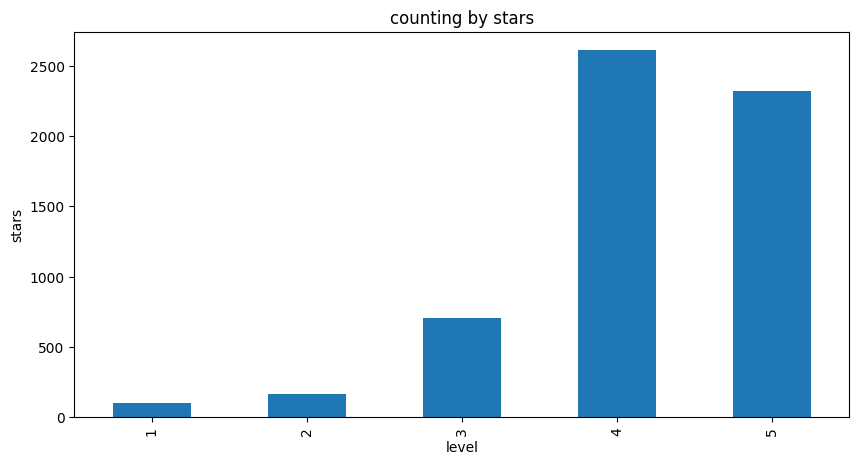

In [17]:
# Creating a plot to see the distribution of reviews according to stars
import matplotlib.pyplot as plt
df["rating"].value_counts().sort_index().plot(kind='bar', title='counting by stars', \
                                           xlabel='level', \
                                           ylabel='stars', figsize=(10,5))
plt.show()

In [ ]:
# counting how many ratings for starlet
df['rating'].value_counts().sort_index()

1      99
2     162
3     702
4    2613
5    2322
Name: rating, dtype: int64

# VADER
*### (lexical dictionary that assigns sentiment scores to words and phrases according to their polarity (positive, negative or neutral))

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# import the tqdm library to display the interactive progress
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [19]:
# I create an instance of the Sentiment Intensity Analyzer class
analyzer = SentimentIntensityAnalyzer()
# I analyse the sentiment of each review and add a column with the sentiment score
scores = df['review'].apply(lambda x: analyzer.polarity_scores(x)).tolist()

In [20]:
# verification of performance
analyzer.polarity_scores("A quality site. I will be referncing this as I build my rubrics for next year's teaching assignment.	")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [21]:
# verification of performance
analyzer.polarity_scores("I find it disgusting")

{'neg': 0.63, 'neu': 0.37, 'pos': 0.0, 'compound': -0.5267}

In [22]:
# creation of a df with Vader scores
vaders = pd.DataFrame(scores)
vaders.head(5)

,neg,neu,pos,compound
0,0.0,0.721,0.279,0.7351
1,0.0,0.861,0.139,0.4404
2,0.0,0.551,0.449,0.8908
3,0.0,0.808,0.192,0.6124
4,0.0,0.855,0.145,0.8934


In [23]:
df.head(3)

,review,rating
0,Thank you for the excellent service that was r...,4
1,"A complete site to learn concepts, methodology...",4
2,This is a great tool in developing relative as...,4


In [25]:
# I add the compound value calculated by VADER to the main df
df = df.join(vaders['compound'], rsuffix='_vader')

In [ ]:
df.tail(2)

,review,rating,id,compound
5896,Escellent lesson! I love how you are incorpora...,5,5896,0.8439
5897,Great lesson. It was clearly labeled and extr...,5,5897,0.8792


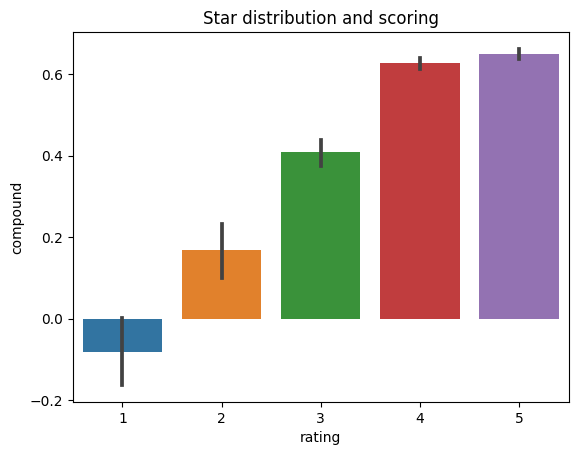

In [26]:
# plot VADER results
# I am checking the present compound score by rating
import seaborn as sns
ax = sns.barplot(data=df,x='rating',y='compound')
ax.set_title('Star distribution and scoring')
plt.show()

In [27]:
df.tail(1)

,review,rating,compound
5897,Great lesson. It was clearly labeled and extr...,5,0.8792


In [28]:
print(df.dtypes)

review       object
rating        int64
compound    float64
dtype: object


In [29]:
!pip install seaborn matplotlib

# TOKENIZZARE

In [30]:
# download POS tagger template to tokenize the words
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# I create a subset of the data for testing and make sure they are strings
example = df["review"][0:200].astype(str)
print(example)

0      Thank you for the excellent service that was r...
1      A complete site to learn concepts, methodology...
2      This is a great tool in developing relative as...
3      Well build and plenty of information. easy to ...
4      The example of the mentor/mentee in learning h...
                             ...                        
195    I find this website very fun, and filled with ...
196    Vast amount of information including games, pu...
197    can be great for geometry students or similar ...
198                          good website to review maTH
199    This site will be good for teachers and parent...
Name: review, Length: 200, dtype: object


In [31]:
df.head(1)

,review,rating,compound
0,Thank you for the excellent service that was r...,4,0.7351


In [32]:
# checking the type of reviews
print(type(df['review']))

<class 'pandas.core.series.Series'>


In [33]:
# conversion of reviews into strings to tokenize them all
df['review'] = df['review'].astype(str)

In [34]:
# tokenise the first 500 lines per test
reviews = df['review'].head(500).tolist()

In [35]:
# Tokenise all reviews and put them in a variable
tokenized_reviews = [nltk.word_tokenize(review) for review in reviews]

In [36]:
tokenized_reviews[50]

['Outstanding',
 'graphics',
 'and',
 'in',
 'depth',
 'portrayals',
 'of',
 'topics',
 '.',
 'A',
 'powerful',
 'learning',
 'device',
 'for',
 'novice',
 'and',
 'expert',
 'alike',
 '.']

In [39]:
from nltk import FreqDist

#token list lita to have a single list
flattened_tokens = [token for sublist in tokenized_reviews for token in sublist]
# Calculating the distinct frequency of tokens
frequenza_token = FreqDist(flattened_tokens)
# I print the 50 most common
frequenza_token.most_common(10)

[('.', 1256),
 ('the', 804),
 ('to', 787),
 ('and', 625),
 (',', 508),
 ('I', 492),
 ('a', 490),
 ('of', 465),
 ('is', 395),
 ('for', 337)]

In [42]:
# creation of a copy column to manipulate the data
df['text_copy'] = df['review'].copy()

# Pre-processing: rimozione delle stop words

In [43]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text_copy'] = df['text_copy'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Rimozione punteggiatura

In [45]:
import re

def remove_punctuation(text):
  # Using regular expression to remove punctuation
    # all characters that are not alphanumeric or whitespace [^\w\s]
    cleaned_text = re.sub(r'[^\w\s]', ' ', text)
    return cleaned_text

df['text_copy'] = df['text_copy'].apply(remove_punctuation)
# unlike tokenization, this is better for me to do directly on the column

# Lemmatization

In [46]:
# conversion to lower case
df["text_copy"] = df["text_copy"].str.lower()

# I apply lemmatization, having a not very large dataset

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# I apply a function to obtain the POS tag for lemmatisation
# is not mandatory but I make the process more efficient
def get_pos_tag(word):
  #
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# I initialise the lemmatizer
lemmatizer = WordNetLemmatizer()

# apply
df["text_copy"] = \
df["text_copy"].apply(lambda x: " ".join([lemmatizer.lemmatize(word, get_pos_tag(word))
    for word in nltk.word_tokenize(x)]))


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [47]:
df.iloc[50:101]

,review,rating,compound,text_copy
50,Outstanding graphics and in depth portrayals o...,5,0.7783,outstanding graphic depth portrayal topic powe...
51,"Excellent material, very comprehensive and use...",5,0.9526,excellent material comprehensive useful it goo...
52,Very helpful site as it includes cultural info...,5,0.6361,helpful site include cultural information well...
53,Provides video and an explanation of daily tas...,4,0.4927,provide video explanation daily task different...
54,Good site for students to hear various Spanish...,4,0.7003,good site student hear various spanish speaker...
55,This website houses an archive of very short m...,5,0.8658,website house archive short medium clip run ap...
56,Very effective for basic knowledge of language...,5,0.8399,effective basic knowledge language interest ma...
57,This website provided a lot of information fro...,4,0.4019,website provide lot information lot different ...
58,This course covers beginning and intermediate ...,5,0.0000,course cover begin intermediate learner focus ...
59,This is a very useful website.\nThough it does...,5,0.8883,useful website though abundance material us mu...


In [49]:
from time import sleep
from tqdm import tqdm

In [50]:
# VADER results on example
print("this is a beautiful day")
analyzer.polarity_scores("this is a beautiful day")

this is a beautiful day


{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}

In [ ]:
df.tail()

# Roberta Pretrained Model

In [51]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00


In [52]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# download the model and its weights
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [53]:
# creation of an example to be used later as an argument of the function
example = df['review'][50]
example

'Outstanding graphics and in depth portrayals of topics. A powerful learning device for novice and expert alike.'

In [ ]:
df.tail(1)

,review,rating,id,compound
5897,Great lesson. It was clearly labeled and extr...,5,5897,0.8792


In [54]:
analyzer.polarity_scores(example)

{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.7783}

In [ ]:
def polarity_scores_roberta(example):

# argument text is tokenized
    tokens = tokenizer(example, return_tensors='pt')
# I get as output a tensor of scores
    output = model(**tokens)
# scores are extracted from the tensor and converted into an array with the .detach() method
    scores = output[0][0].detach().numpy()
# normalise the vector with the softmax function
    scores = softmax(scores)
# I create a dictionary to store normalisation results
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
# initialize an empty dictionary
res = {}
# iterate through the DataFrame using the index 'i' and the corresponding row, 'row', using 'tqdm' to track progress
for i, row in tqdm(df.iterrows(), total=len(df)):
    # use try/except to ensure skipping reviews that cause problems
    try:
        # specify where to extract the reviews
        text = row['review']
        myid = row['id']
        # instantiate the 'analyzer' object and use it to obtain polarity scores calculated by VADER
        vader_result = analyzer.polarity_scores(text)
        # create a separate dictionary just for VADER results to avoid conflicts
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        # apply the 'polarity_scores_roberta' function to the 'text_copy' column of reviews and save the results in 'roberta_result'
        roberta_result = polarity_scores_roberta(text)
        # associate the results of both dictionaries
        both = {**vader_result_rename, **roberta_result}
        # add the 'both' dictionary to the 'res' dictionary using the 'id' as the key
        res[myid] = both
    # handle exceptions
    except RuntimeError:
        print(f'Broke for id {myid}')


100%|██████████| 5898/5898 [19:48<00:00,  4.96it/s]


In [ ]:
# df with results
results_df = pd.DataFrame(res).T

In [ ]:
results_df.head(5)

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,0.0,0.721,0.279,0.7351,0.001814,0.016006,0.982180
1,0.0,0.861,0.139,0.4404,0.003064,0.161995,0.834941
2,0.0,0.551,0.449,0.8908,0.002442,0.029534,0.968025
3,0.0,0.808,0.192,0.6124,0.171947,0.400785,0.427269
4,0.0,0.855,0.145,0.8934,0.002124,0.035393,0.962483


In [ ]:
df.head()

,review,rating,id,compound
0,Thank you for the excellent service that was r...,4,0,0.7351
1,"A complete site to learn concepts, methodology...",4,1,0.4404
2,This is a great tool in developing relative as...,4,2,0.8908
3,Well build and plenty of information. easy to ...,4,3,0.6124
4,The example of the mentor/mentee in learning h...,5,4,0.8934


In [ ]:
# reset the index of results_df and rename the index column to 'id' to do the merge
results_df = results_df.reset_index().rename(columns={'index': 'id'})
# I merge this df with the main one
total_set = results_df.merge(df, how='left')

In [ ]:
total_set.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'review', 'rating',
       'compound'],
      dtype='object')

In [ ]:
# sentiment based on RoBERTa scores
def determine_sentiment(row):
    if row['roberta_neg'] > row['roberta_neu'] and row['roberta_neg'] > row['roberta_pos']:
        return 'negative'
    elif row['roberta_neu'] > row['roberta_pos'] and row['roberta_neu'] > row['roberta_neg']:
        return 'neutral'
    else:
        return 'positive'

# I apply the function to each row of the dataframe and create the new column
total_set['sentiment'] = total_set.apply(determine_sentiment, axis=1)

In [ ]:
# I check the correlation between VADER. and RoBERTa. scores
import seaborn as sns
sns.pairplot(data=total_set,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='score',
            palette='tab10')
plt.show()

# ANALISI DELLE PERFORMANCE

In [ ]:
# Extracting random reviews for analysis since labels are not available

# In this case, I examine a negative review (rating=1) classified as positive by RoBERTa
total_set.query('rating == 1') \
   .sort_values('roberta_pos', ascending=False)['review'].values[0] # I need to use .values to access the array I created with the results based on rating=1
   # Sorting to have the highest RoBERTa score for rows with rating=1
# Sorting in descending order to have the highest RoBERTa results first


'Very interactive website for teaching basic chemical thermodynamics.'

In [ ]:
total_set.query('rating == 1') \
    .sort_values('vader_pos', ascending=False)['review'].values[0]

'This links to a Amazon textbook. Free for Kindle. Not a resources to be used in class.'

In [ ]:
# here on the contrary, I take a review with rating=5 rated as negative by RoBERTa
total_set.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['review'].values[0]
# la performance è ottima

'the link to this material does not work'

In [ ]:
# rating=5 evalued as negative from RoBERTa
total_set.query('rating == 5') \
    .sort_values('vader_neg', ascending=False)['review'].values[0]

'THE LINK IS DEAD.'

In [ ]:
# I make a general count of the labels assigned by RoBERTa
sentiment_counts = total_set['sentiment'].value_counts()
sentiment_counts

positive    4861
neutral      701
negative     336
Name: sentiment, dtype: int64

In [ ]:
# Select reviews with rating 1 and sort by 'roberta_pos' in descending order
selected_reviews = total_set.query('rating == 1').sort_values('roberta_pos', ascending=False)

# View reviews with the highest 'roberta_pos' rating and low rating
print("Recensioni con valutazione 1 e il punteggio 'roberta_pos' più alto:")
print("-" * 10)
for idx, row in selected_reviews.head(5).iterrows():
    review_text = row['review']
    roberta_pos_score = row['roberta_pos']
    print(f"Recensione {idx} - Punteggio 'roberta_pos': {roberta_pos_score}")
    print(review_text)
    print("-" * 50)


Recensioni con valutazione 1 e il punteggio 'roberta_pos' più alto:
----------
Recensione 3492 - Punteggio 'roberta_pos': 0.7753152847290039
Very interactive website for teaching basic chemical thermodynamics.
--------------------------------------------------
Recensione 4080 - Punteggio 'roberta_pos': 0.5606253147125244
I spent about 5 minutes browsing this site.  the content of this site is not enough but the little info it has is informative.  it is very easy to follow but it just needs a little more.  Technical Remarks: This site has good information on it and is very easy to follow.  It is just not enough info on this site.   
--------------------------------------------------
Recensione 5203 - Punteggio 'roberta_pos': 0.48964351415634155
The Website is a picture gallery, featuring photos of the myriad artifacts of Korean culture.  Its only potential use as a language learning resources would be the incorporation of those photos into a lesson -- no writing; reading; listening; or 

In [ ]:
# Select reviews with rating 1 and sort by 'roberta_pos' in descending order
selected_reviews = total_set.query('rating == 2').sort_values('roberta_pos', ascending=False)

# View reviews with the highest 'roberta_pos' rating and low rating
print("Recensioni con valutazione 1 e il punteggio 'roberta_pos' più alto:")
print("-" * 50)
for idx, row in selected_reviews.head(5).iterrows():
    review_text = row['review']
    roberta_pos_score = row['roberta_pos']
    print(f"Recensione {idx} - Punteggio 'roberta_pos': {roberta_pos_score}")
    print(review_text)
    print("-" * 50)

Recensioni con valutazione 1 e il punteggio 'roberta_pos' più alto:
--------------------------------------------------
Recensione 4589 - Punteggio 'roberta_pos': 0.9293038845062256
This business site has useful tips about creating online tutorials. They offer some free tutorial templates and "agents" if one signs up for a free account. There are many other templates and tools offered for premium (paid) accounts.
--------------------------------------------------
Recensione 3984 - Punteggio 'roberta_pos': 0.9123597741127014
I spent about 45 minutes reviewing this site. The quality of the content is are educational if you are interested in early technology. It may have potential to enhance teaching if you are studying and learning about early interventions and instruments in psychology. The first time user will be able to obtain the material with ease.
--------------------------------------------------
Recensione 4321 - Punteggio 'roberta_pos': 0.8992675542831421
Site is good to use if y

In [ ]:
# Select reviews with rating 1 and sort by 'roberta_pos' in descending order
selected_reviews = total_set.query('rating == 1').sort_values('roberta_neg', ascending=False)

# View reviews with the highest 'roberta_pos' rating
print("Recensioni con valutazione 1 e il punteggio 'roberta_neg' più alto:")
print("-" * 50)
for idx, row in selected_reviews.head(5).iterrows():
    review_text = row['review']
    roberta_pos_score = row['roberta_neg']
    print(f"Recensione {idx} - Punteggio 'roberta_neg': {roberta_pos_score}")
    print(review_text)
    print("-" * 50)
# I can see how negative reviews correspond to very high negative RoBERTa scores
# the model seems to interpret sentiment very well

Recensioni con valutazione 1 e il punteggio 'roberta_neg' più alto:
--------------------------------------------------
Recensione 948 - Punteggio 'roberta_neg': 0.9751182794570923
This is another example of the the field of Psychology "going off the deep end." Wait until child molesters and sexual predators have their day with the DSM. I did not like the site because the behavior behind it is not acceptable.
--------------------------------------------------
Recensione 3030 - Punteggio 'roberta_neg': 0.9683945178985596
--------------------------------------------------
Recensione 3467 - Punteggio 'roberta_neg': 0.967257022857666
I couldn't get this site to work. :o(
--------------------------------------------------
Recensione 5253 - Punteggio 'roberta_neg': 0.9669243097305298
This site looks like a two-page handout I would get in class. Regardless of whether it contains good information, I wouldn't recommend this site to anyone. Website should be interactive!! This is very disappointi

In [ ]:
total_set